# Informações do aluno
**Nome:** Matheus Peixoto Ribeiro Vieira

**Matrícula:** 22.1.4104

In [13]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

data = pd.read_csv("titanic/train.csv")

# 1 - Análise descritiva dos atributos

## a)
- **PassengerId**: Atributo discreto
- **Survived**: Valor binário simétrico, uma vez que ambos os dados possuem o mesmo grau de importância 
- **Pclass**: Valor categórico ordinal, pois apresentam uma certa ordem 
- **Name**: Valor categorico nominal
- **Sex**: Valor categorico nominal 
- **Age**: Atributo discreto, pois assume-se apenas valores inteiros
- **SibSp**: Atributo discreto, pois é contável a quantidade de irmãos ou conjuges
- **Parch**: Atributo discreto, pois é contável a quantidade de pais e crianças
- **Ticket**: Categorico nominal, mesmo apresentando números, possui textos e serve apenas como identificação
- **Fare**: Atributo contínuo identificando o valor pago da tarifa
- **Cabin**: Atributo categorico nominal
- **Embarked**: Valor categórico nominal

## b) 

Para atributo numérico, identifique qual o seu intervalo de valores, valor médio, máximo, mínimo, desvio-padrão e valores aberrantes. Use funcões do dataframe para isso (por exemplo, describe, mean, sum ,...). Faça gráficos estilo boxplots para visualizar os possíveis outliers. Comente os resultados.

In [14]:
numerical_attributes = ["Age", "SibSp", "Parch", "Fare"]
described_data_frame = data[numerical_attributes].describe()

described_data_frame

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


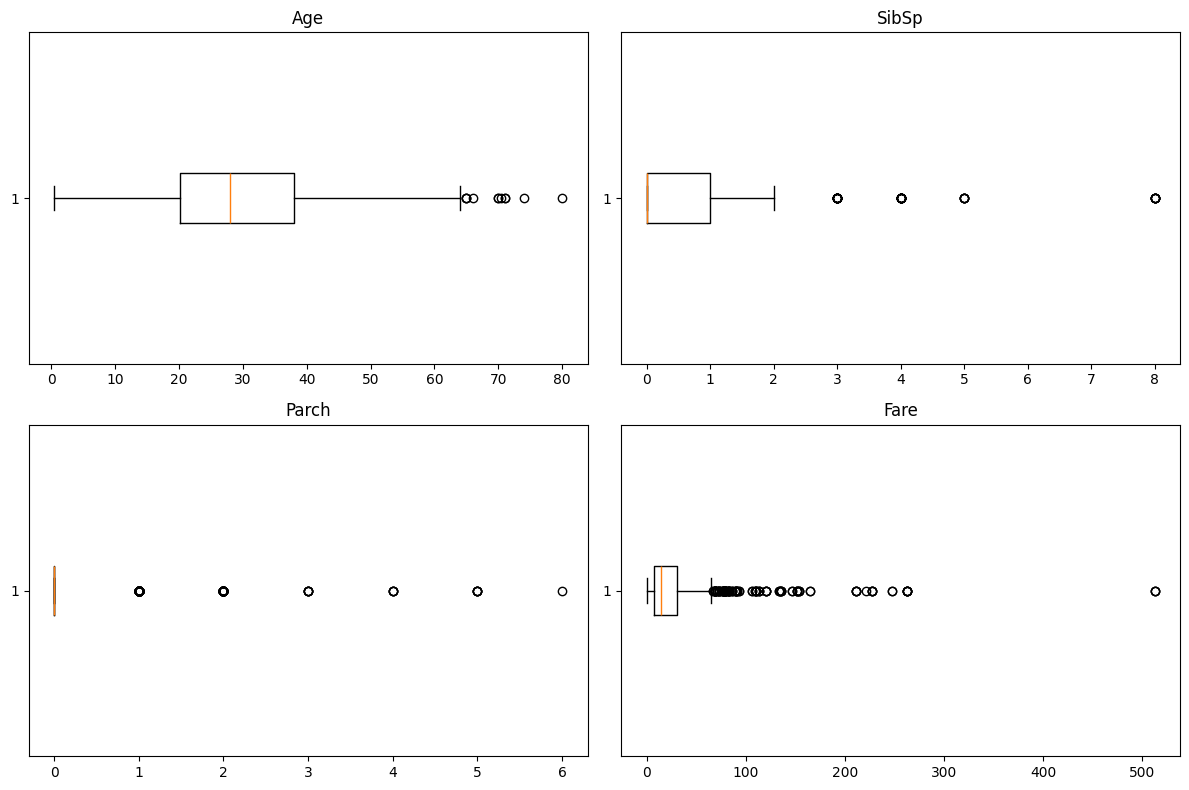

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) 
axes = axes.flatten() 

for i, attribute in enumerate(numerical_attributes):
    axes[i].boxplot(data[attribute].dropna(), orientation='horizontal')
    axes[i].set_title(attribute)

plt.tight_layout()
plt.show()

A coluna de idades possui valores nulos, e a maior parte das pessoas possui menos de 40 anos, considerando como outliers aqueles que são mais velhos, apenas.

A grande maioria dos passageiros aparentam estarem viajando sem filhos ou seus pais, sendo que, provavelmente, estão com seus conjuges ou irmãos. Tal análise pode ser feita a partir da investigação dos valores de Parch, onde, até o terceiro quartil, a quantidade de pais ou crianças estão no valor zero, e o mesmo não ocorre com o SibSp.

Por fim, percebe-se que o valor das passagens teve uma grande oscilação, com uma média de 32, porém que supera o valor do terceiro quartil, indicando uma grande presença de outliers, que se torna evidente ao analisar os dados e, ao mesmo tempo visível ao desenhar o boxplot, onde um item supera o valor de 500

## c) 
Para os atributos binários, nominais e ordinais, indique quais os valores possíveis e a popularidade (distribuição de probabilidade) de cada.

In [16]:
attributes_list = ["Survived", "Pclass", "Sex", "Embarked"]
for attribute in attributes_list:
    print(f"{data[attribute].value_counts(normalize=True)}")
    print("\n")

attributes_list = ["Name", "Ticket", "Cabin"]
for attribute in attributes_list:
    print(f"{attribute}: {len(data[attribute].unique())} unique values")


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64


Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64


Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64


Name: 891 unique values
Ticket: 681 unique values
Cabin: 148 unique values


## d) 
Identifique os valores ausentes (isna ou isnull), aberrantes e inconsistências.

In [17]:
for index, value in data.isnull().any().items():    
    if value:
        print(f"{index} contains {data[index].isnull().sum()} null values")


Age contains 177 null values
Cabin contains 687 null values
Embarked contains 2 null values


In [18]:
for attribute in numerical_attributes:
    values = data[attribute].dropna()
    Q1 = values.quantile(0.25)
    Q3 = values.quantile(0.75)
    AIQ = Q3 - Q1
    lower_bound = Q1 - 1.5 * AIQ
    upper_bound = Q3 + 1.5 * AIQ

    outliers = values[(values < lower_bound) | (values > upper_bound)]

    print(f"Outliers in {attribute}:")
    print(outliers)
    print("-" * 40)


Outliers in Age:
33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64
----------------------------------------
Outliers in SibSp:
7      3
16     4
24     3
27     3
50     4
59     5
63     3
68     4
71     5
85     3
88     3
119    4
159    8
164    4
171    4
176    3
180    8
182    4
201    8
229    3
233    4
261    4
266    4
278    4
324    8
341    3
374    3
386    5
409    3
480    5
485    3
541    4
542    4
634    3
642    3
683    5
686    4
726    3
787    4
792    8
813    4
819    3
824    4
846    8
850    4
863    8
Name: SibSp, dtype: int64
----------------------------------------
Outliers in Parch:
7      1
8      2
10     1
13     5
16     1
      ..
871    1
879    1
880    1
885    5
888    2
Name: Parch, Length: 213, dtype: int64
----------------------------------------
Outliers in Fare:
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52  

## e) 
Verifique e comente a correlação entre os atributos numéricos (corr).

In [19]:
data[["Survived"] + numerical_attributes].corr(method='pearson')

,Survived,Age,SibSp,Parch,Fare
Survived,1.000000,-0.077221,-0.035322,0.081629,0.257307
Age,-0.077221,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,0.096067,0.159651,0.216225,1.000000


Analisando a matriz de correlação, percebemos que os dados são muito independentes entre si, sendo que o mais correlato é entre Parch e SibSp, indicando padrões familiares.

Survived: A relação do Survived com a maioria dos dados é pouco significativa, mas percebe-se uma maior correlação em relação ao valor pago da passagem, ou seja, quanto maior o valor pago, mais chances da pessoa ter sobrevivido

Age: Quando a idade aumenta, as pessoas tendem a viajar mais sozinhas, e o preço das passagens permanecem semelhantes, pois há uma correlação fraca

SibSp: Aqueles que viajam com irmãos ou conjugês tendem a estarem com pais ou filhos, indicando uma presença familiar. Ademais, esses passageiros são mais jovens, por causa do valor negativo de Age

Parch: Aqueles que viajam com crianças ou pais tendem a viajar mais com os irmãos e acabam pagando um pouco mais nas passagens

Fare: Aqueles que pagam mais tendem a estarem mais acompanhados

# 2 - Limpeza de dados e transformação

# a) 
Preencha os valores ausentes (Tente atribuir o valor mais provável).

In [20]:
# Age contains 177 null values -- Null values will receive the mean, since the distribution of the data is quiet symmetric
mean_age = data["Age"].mean()
data["Age"] = data["Age"].fillna(mean_age)

# Cabin contains 687 null values -- Null values will receive a special character U of Unkown
data["Cabin"] = data["Cabin"].fillna("U")

# Embarked contains 2 null values -- Null values will receive the most common value
mode = data["Embarked"].mode()[0]
data["Embarked"] = data["Embarked"].fillna(mode)

# b) 
Suavize os ruídos (use o qcut ou cut para dividir os bins).

In [21]:
Q1 = values.quantile(0.25)
Q3 = values.quantile(0.75)
AIQ = Q3 - Q1
upper_bound = Q3 + 1.5 * AIQ

bounds, _ = pd.cut(data["Fare"], 4, retbins=True)

for index, row in data.iterrows():
    if row["Fare"] > upper_bound:
        mean = (bounds[index].left + bounds[index].right) / 2.0
        data.loc[index, "Fare"] = mean


# c) 
Resolva as inconsistências, se houver.

As inconsistências já foram resolvidas ao colocar valores onde não havia.

Outras inconsitências não foram identificadas

Todavia a coluna de nomes e id serão removidas, uma vez que apresentam valores únicos que não aparentam serem úteis

In [22]:
data = data.drop(["PassengerId", "Name"], axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.250,U,S
1,1,1,female,38.000000,1,0,PC 17599,63.785,C85,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.925,U,S
3,1,1,female,35.000000,1,0,113803,53.100,C123,S
4,0,3,male,35.000000,0,0,373450,8.050,U,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.000,U,S
887,1,1,female,19.000000,0,0,112053,30.000,B42,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.450,U,S
889,1,1,male,26.000000,0,0,111369,30.000,C148,C


# d) & e)
Transforme atributos categóricos nominais em um vetor numérico (por exemplo, usando o OneHotEncoder). 
 
Transforme atributos categóricos ordinais em atributos numéricos seguindo a ordem entre eles.

In [23]:
# transforming sex into binary data
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})

# transforming tickets into numerical data
le = sklearn.preprocessing.LabelEncoder()
data["Ticket"] = le.fit_transform(data["Ticket"])

# transforming cabin into numerical data
le = sklearn.preprocessing.LabelEncoder()
data["Cabin"] = le.fit_transform(data["Cabin"])

# transforming Embarked into one hot encoded
data = pd.get_dummies(data, columns=["Embarked"], prefix="Embarked", dtype=int)

data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,523,7.250,147,0,0,1
1,1,1,1,38.000000,1,0,596,63.785,81,1,0,0
2,1,3,1,26.000000,0,0,669,7.925,147,0,0,1
3,1,1,1,35.000000,1,0,49,53.100,55,0,0,1
4,0,3,0,35.000000,0,0,472,8.050,147,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,101,13.000,147,0,0,1
887,1,1,1,19.000000,0,0,14,30.000,30,0,0,1
888,0,3,1,29.699118,1,2,675,23.450,147,0,0,1
889,1,1,0,26.000000,0,0,8,30.000,60,1,0,0


# f)
Normalize os valores de atributos numéricos.

In [24]:
min_age = data["Age"].min()
max_age = data["Age"].max()
data["Age"] = (data["Age"] - min_age) / (max_age - min_age)


min_fare = data["Fare"].min()
max_fare = data["Fare"].max()
data["Fare"] = (data["Fare"] - min_fare) / (max_fare - min_fare)

data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,0.271174,1,0,523,0.016173,147,0,0,1
1,1,1,1,0.472229,1,0,596,0.142286,81,1,0,0
2,1,3,1,0.321438,0,0,669,0.017678,147,0,0,1
3,1,1,1,0.434531,1,0,49,0.118451,55,0,0,1
4,0,3,0,0.434531,0,0,472,0.017957,147,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0.334004,0,0,101,0.028999,147,0,0,1
887,1,1,1,0.233476,0,0,14,0.066921,30,0,0,1
888,0,3,1,0.367921,1,2,675,0.052310,147,0,0,1
889,1,1,0,0.321438,0,0,8,0.066921,60,1,0,0
